In [2]:
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as s
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
#optimum parameter choosing 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pickle
import os 
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv('./data/cancer_data.csv')
display (data)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
display (data.shape)

(569, 32)

In [5]:
df = data
display (df)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
display (df['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64

In [7]:
print (df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
df['diagnosis']= df['diagnosis'].astype('category')
display (df.dtypes)


id                            int64
diagnosis                  category
radius_mean                 float64
texture_mean                float64
perimeter_mean              float64
area_mean                   float64
smoothness_mean             float64
compactness_mean            float64
concavity_mean              float64
concave points_mean         float64
symmetry_mean               float64
fractal_dimension_mean      float64
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:

le = LabelEncoder()
df['diagnosis']= le.fit_transform (df['diagnosis'])
display (df)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
x= df.drop ('diagnosis',axis =1).drop('id',axis =1)
display (x)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
y = df['diagnosis']
display (y)


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [13]:
col = x. columns
display (col)


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
x.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [15]:
x_norm = (x- x.mean()) / (x.max()- x.min())
x_norm= pd.concat ([x_norm,y], axis =1 )
display (x_norm)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.182815,-0.301307,0.213053,0.146813,0.198968,0.531437,0.495081,0.487976,0.306758,0.335139,...,-0.222474,0.385173,0.279792,0.196998,0.399079,0.351207,0.518192,0.335156,0.229268,1
1,0.304923,-0.051392,0.282848,0.284671,-0.104905,-0.078833,-0.004450,0.105621,0.000193,-0.129057,...,-0.060427,0.256680,0.264308,-0.056585,-0.065649,-0.024432,0.245339,-0.029717,0.033282,1
2,0.263274,0.066295,0.262808,0.232497,0.119524,0.170416,0.254453,0.392549,0.129991,-0.059132,...,-0.003924,0.225304,0.203602,0.079452,0.165163,0.142341,0.441216,0.140399,0.023837,1
3,-0.128132,0.036874,-0.099434,-0.114014,0.416536,0.550761,0.357546,0.279726,0.396657,0.729621,...,0.021929,-0.041791,-0.076898,0.511335,0.593799,0.331239,0.491044,0.736693,0.584115,1
4,0.291671,-0.167388,0.298051,0.272369,0.035567,0.087292,0.255859,0.275253,-0.001323,-0.083564,...,-0.240065,0.223810,0.170669,0.033226,-0.047797,0.102086,0.164583,-0.105806,-0.047001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.351778,0.104848,0.345733,0.349570,0.132163,0.035455,0.363404,0.447221,-0.043242,-0.138324,...,0.019264,0.293036,0.281758,0.056999,-0.041685,0.110632,0.367676,-0.165731,-0.083929,1
565,0.284098,0.303022,0.271101,0.257099,0.012997,-0.002886,0.129336,0.243493,-0.030110,-0.157279,...,0.335095,0.237755,0.209009,-0.104131,-0.060216,0.039386,0.165614,-0.064805,-0.115281,1
566,0.117029,0.297273,0.112853,0.086198,-0.106620,-0.006260,0.008694,0.020382,-0.111929,-0.133058,...,0.225021,0.096812,0.059825,-0.121961,0.053492,0.054402,0.093449,-0.134586,-0.037687,1
567,0.306342,0.339545,0.332603,0.258796,0.193552,0.529596,0.615278,0.512330,0.295647,0.155063,...,0.366279,0.385173,0.231129,0.215488,0.595546,0.532357,0.516817,0.233835,0.262719,1


In [16]:
co_rel= x_norm.corr()
display (co_rel)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


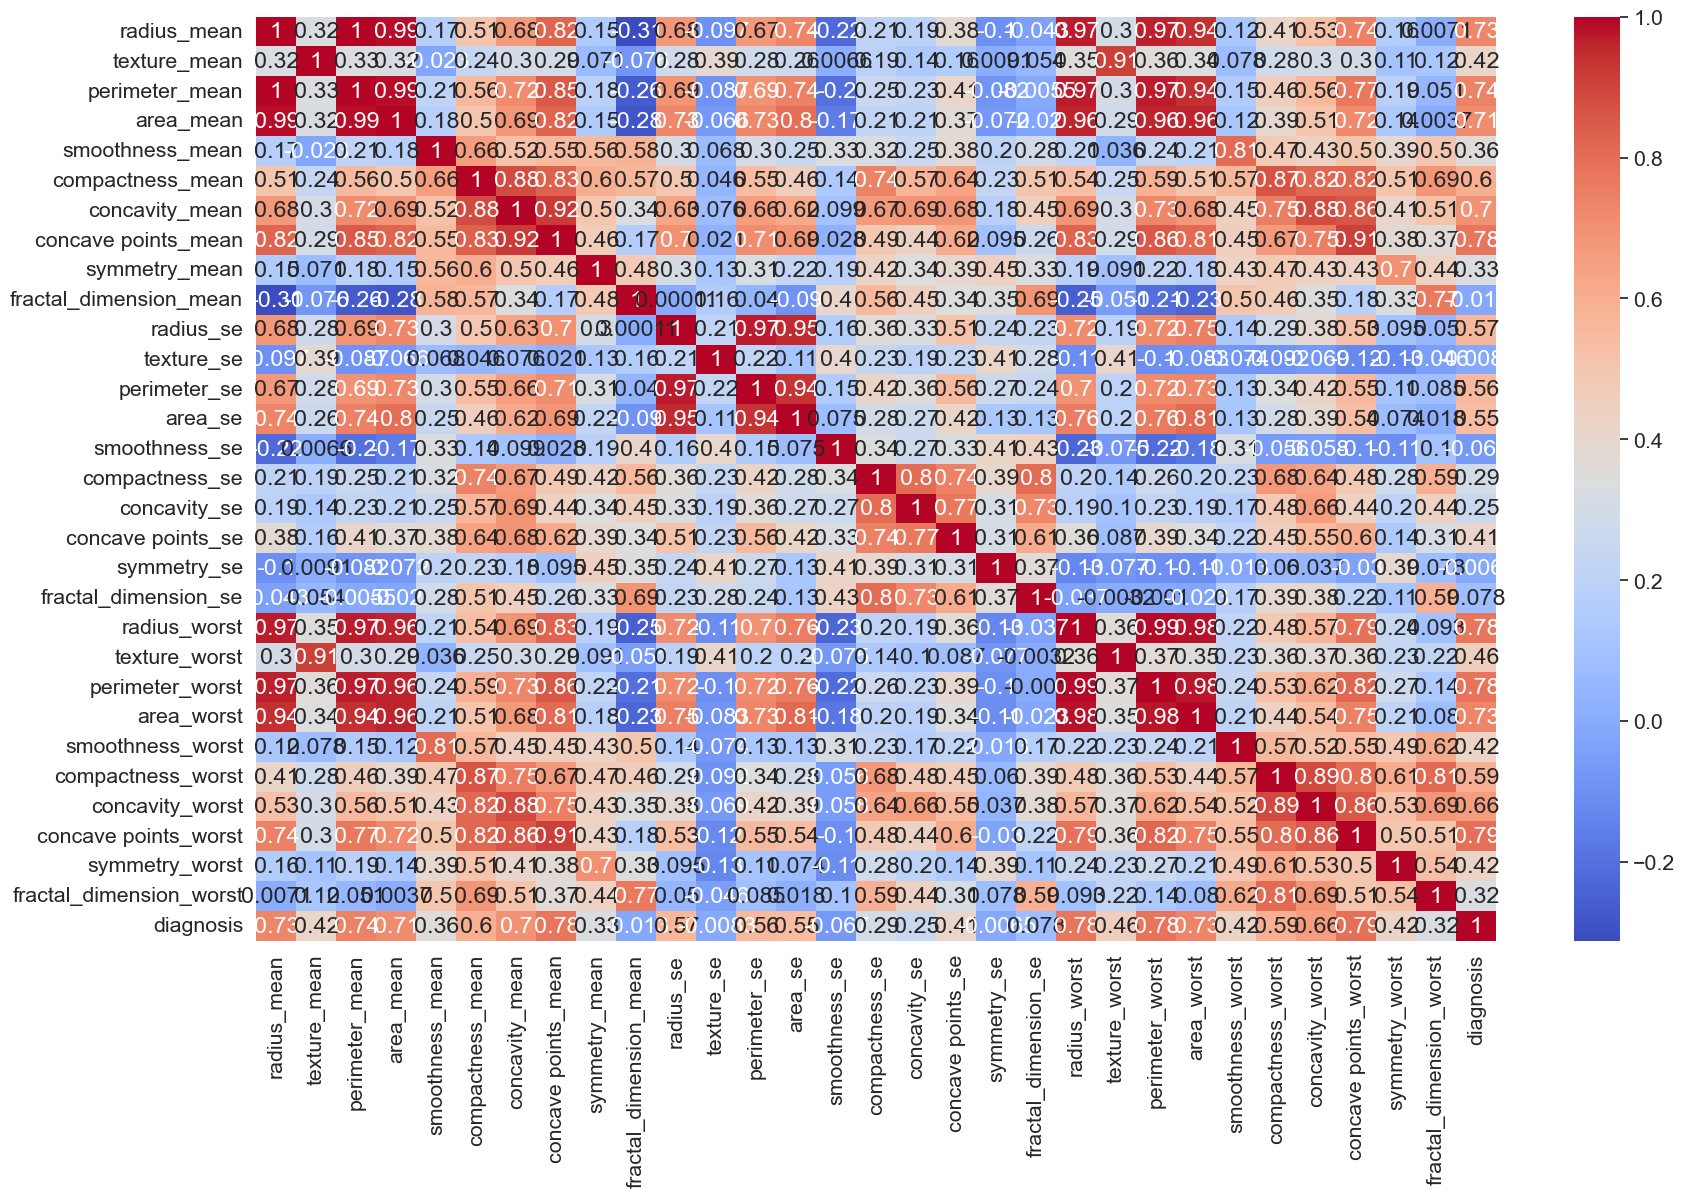

In [17]:
plt.rcParams['figure.figsize']=(20,12)
s.set(font_scale=1.4)
# In co relation 1 is the highest and -1 is lowest
s.heatmap (co_rel,cmap = 'coolwarm',annot = True)
plt.show()


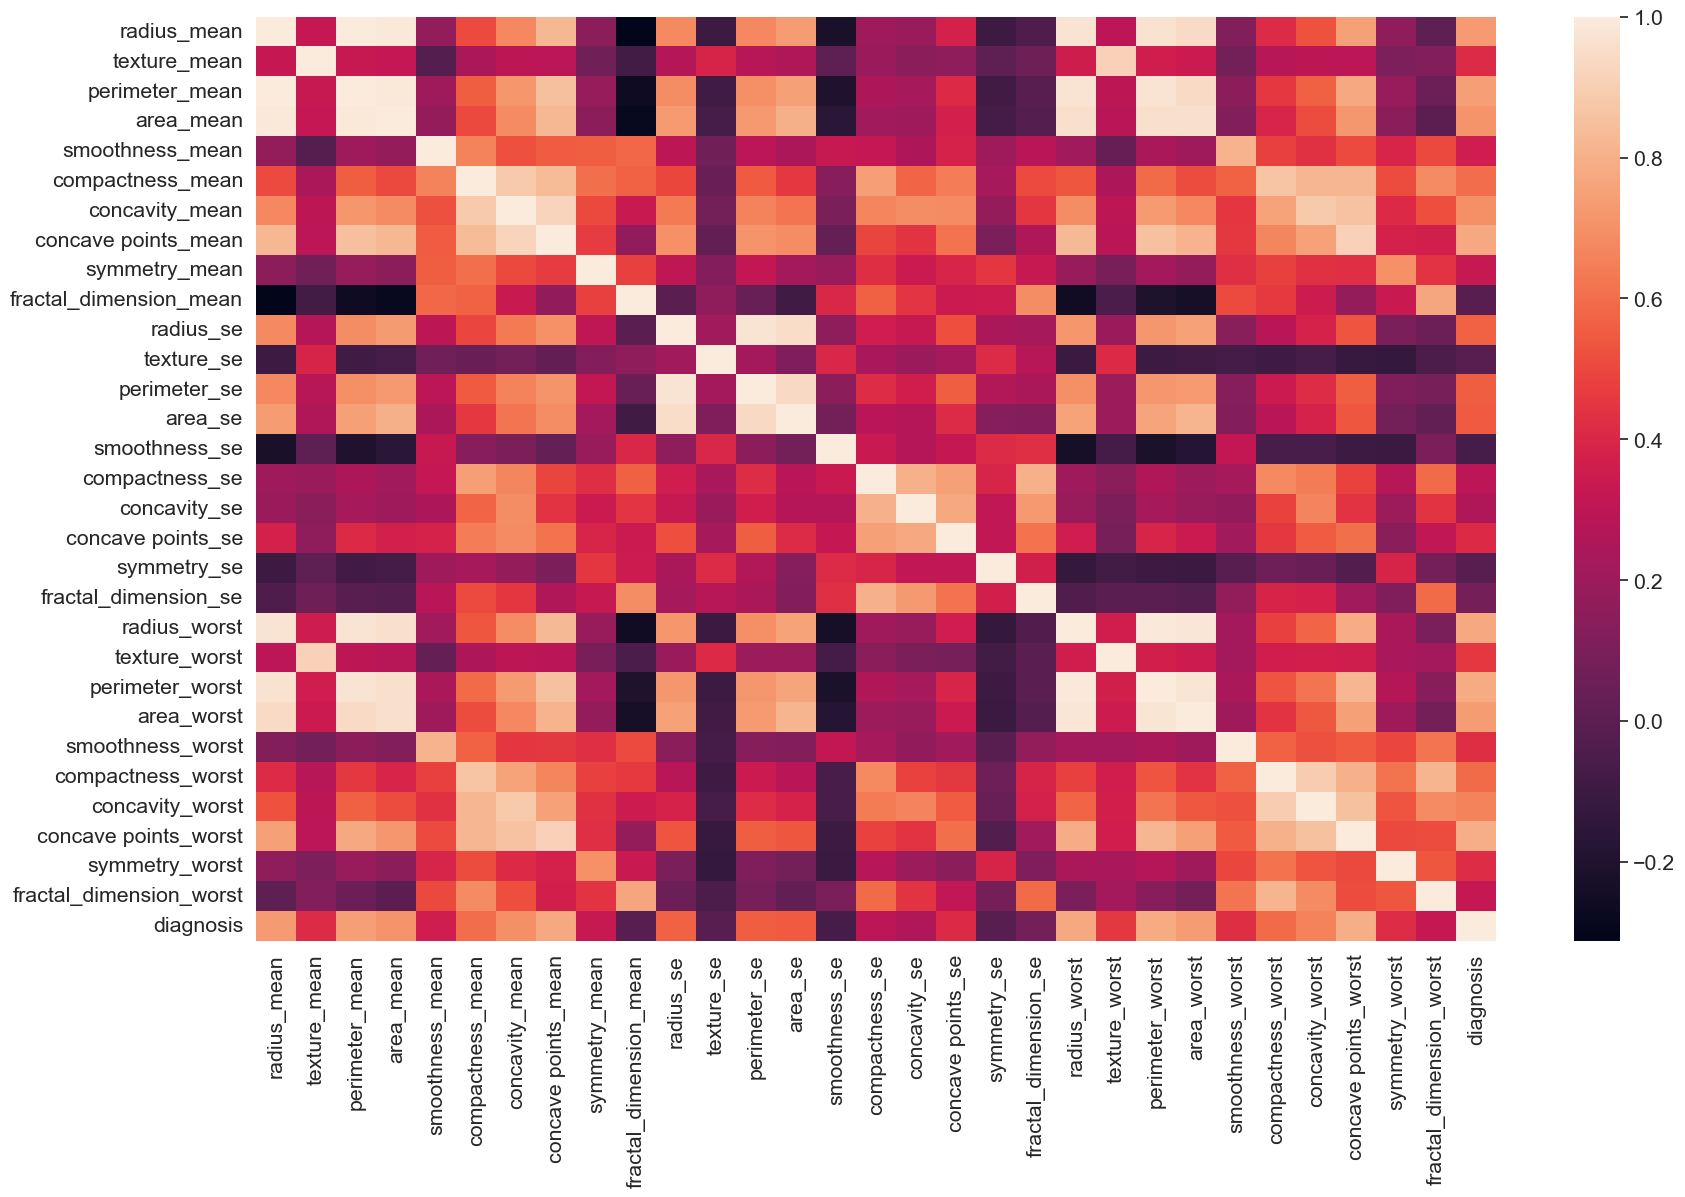

In [18]:
plt.rcParams['figure.figsize']=(20,12)
s.set(font_scale=1.4)
# In co relation 1 is the highest and -1 is lowest
s.heatmap (co_rel)
plt.show()


In [19]:
 x_norm.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


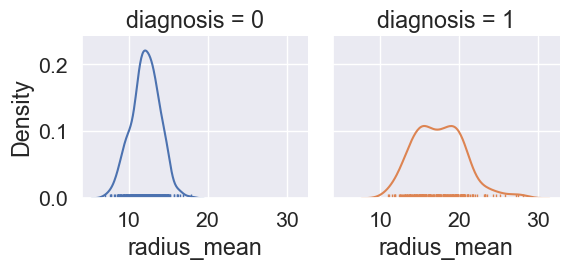

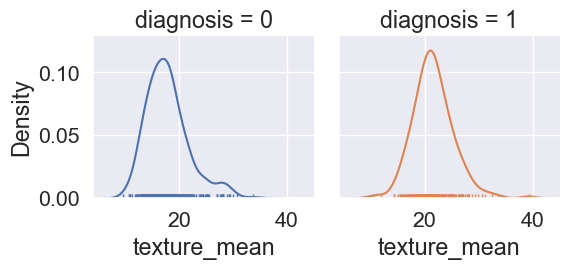

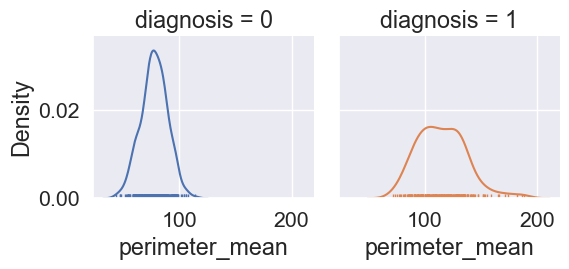

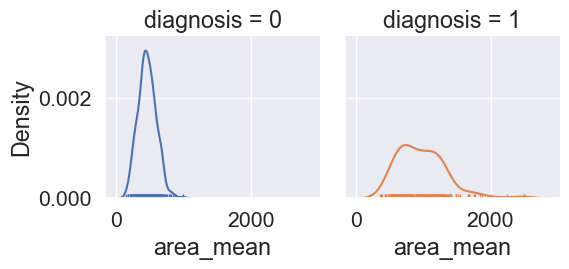

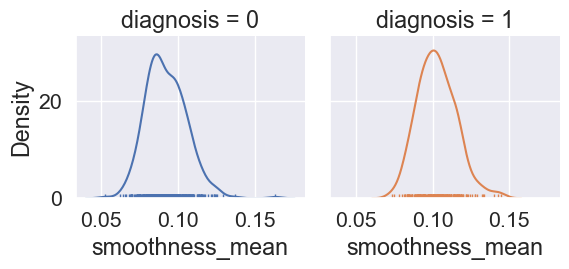

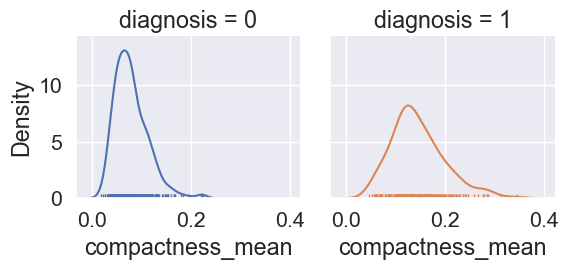

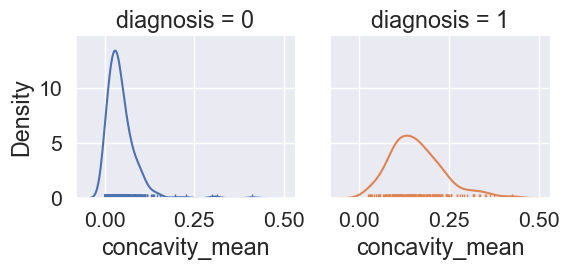

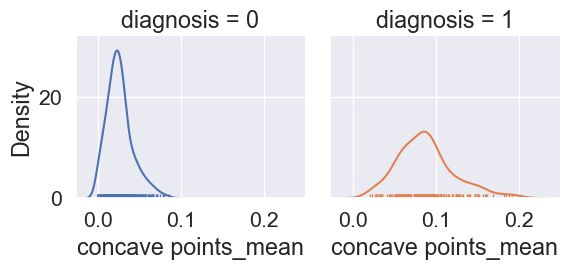

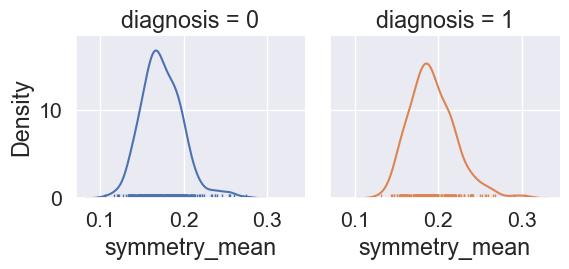

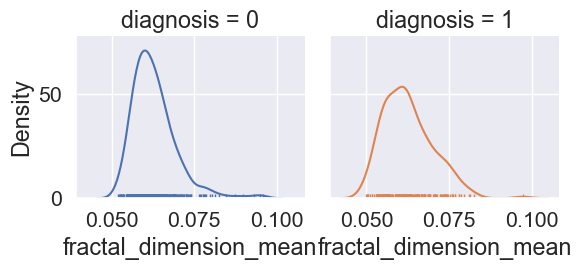

In [22]:
g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, "radius_mean", hist = False, rug = True)

g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, 'texture_mean', hist = False, rug = True)

g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, 'perimeter_mean', hist = False, rug = True)

g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, "area_mean", hist = False, rug = True)

g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, "smoothness_mean", hist = False, rug = True)

g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, "compactness_mean", hist = False, rug = True)

g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, "concavity_mean", hist = False, rug = True)

g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, "concave points_mean", hist = False, rug = True)

g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, "symmetry_mean", hist = False, rug = True)

g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, "fractal_dimension_mean", hist = False, rug = True)



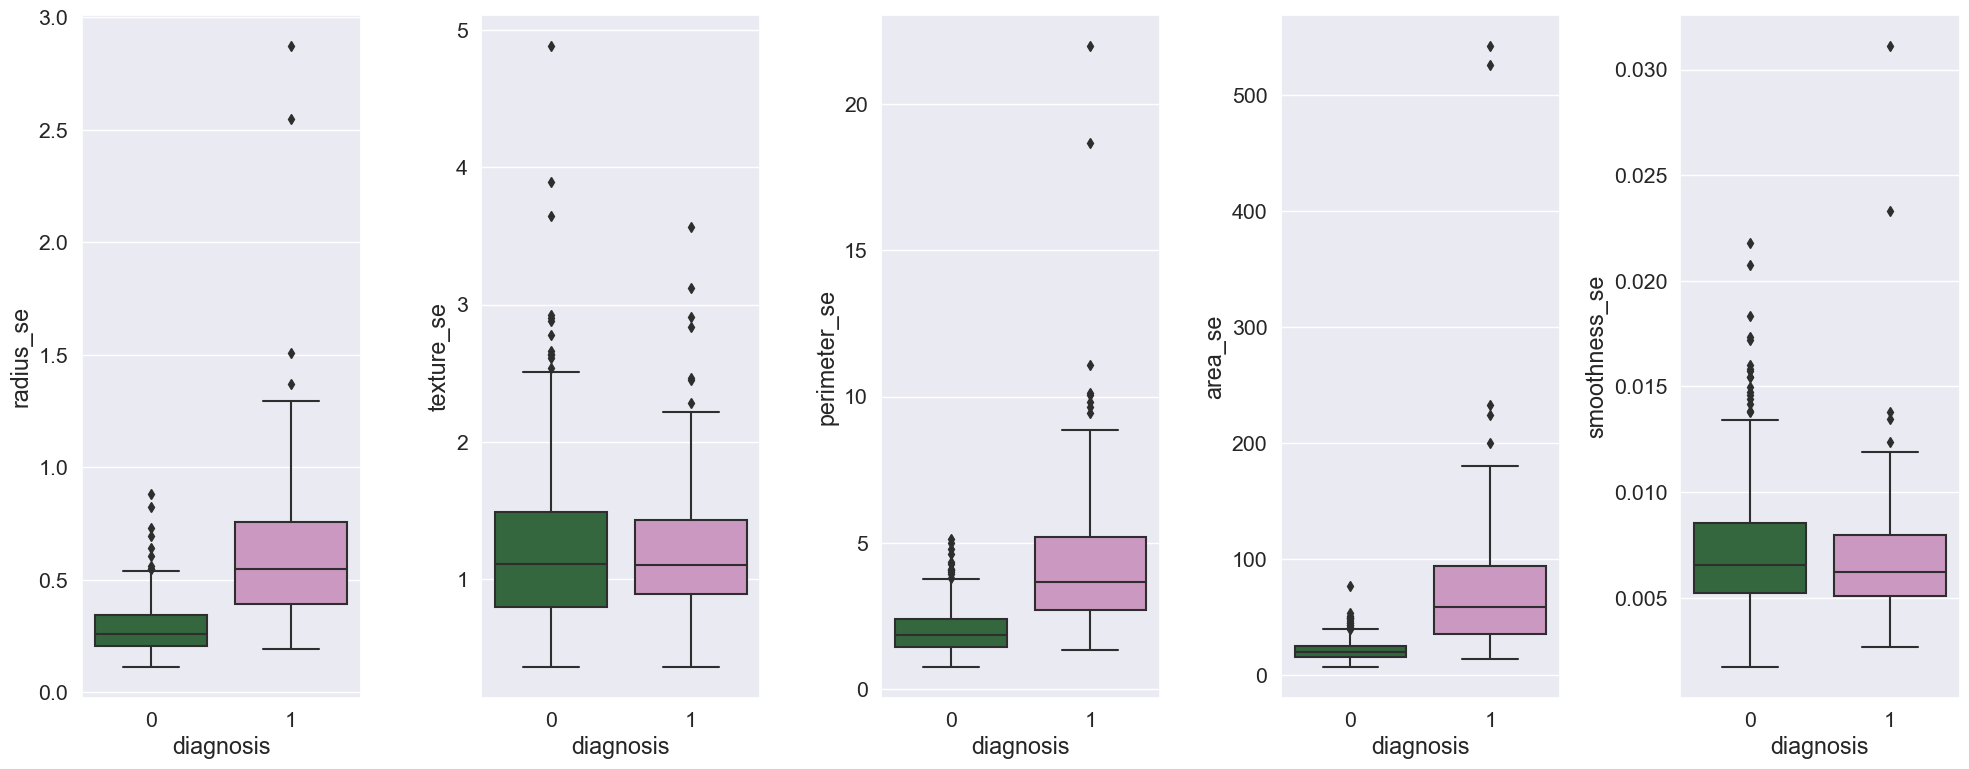

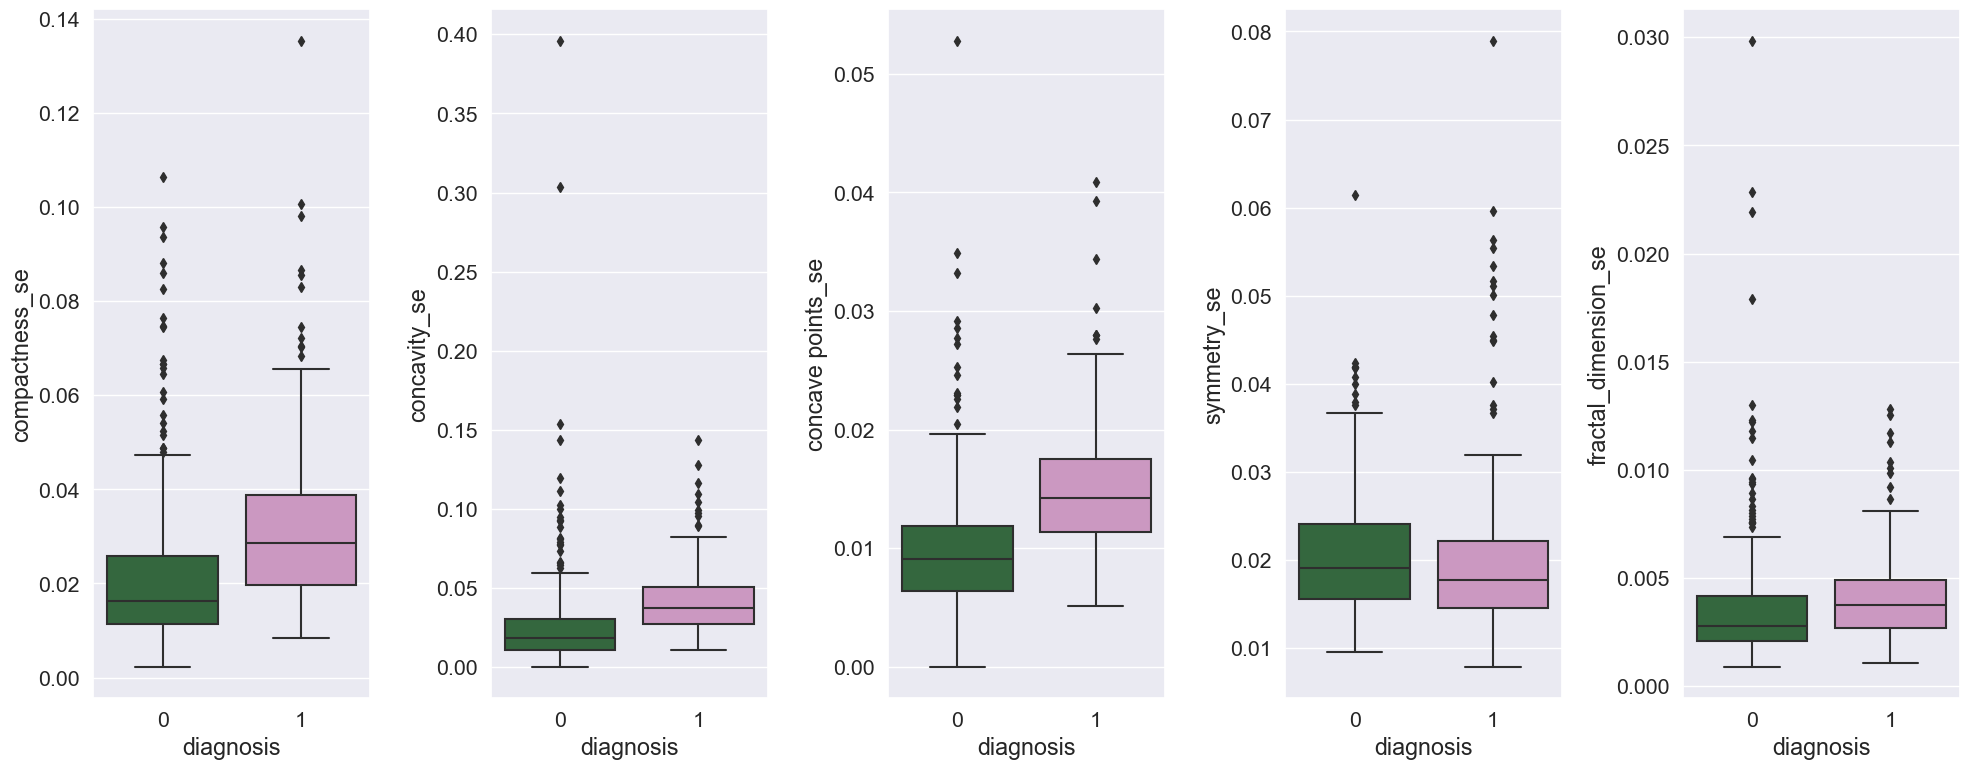

In [23]:
plt.rcParams['figure.figsize']=(20,8)
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
s.boxplot ('diagnosis', y = 'radius_se',data = df , ax = ax1,palette = 'cubehelix')
s.boxplot ('diagnosis', y = 'texture_se',data = df , ax = ax2,palette = 'cubehelix')
s.boxplot ('diagnosis', y = 'perimeter_se',data = df , ax = ax3,palette = 'cubehelix')
s.boxplot ('diagnosis', y = 'area_se',data = df , ax = ax4,palette = 'cubehelix')
s.boxplot ('diagnosis', y = 'smoothness_se',data = df , ax = ax5,palette = 'cubehelix')
f .tight_layout()

f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
s.boxplot ('diagnosis', y = 'compactness_se',data = df , ax = ax1,palette = 'cubehelix')
s.boxplot ('diagnosis', y = 'concavity_se',data = df , ax = ax2,palette = 'cubehelix')
s.boxplot ('diagnosis', y = 'concave points_se',data = df , ax = ax3,palette = 'cubehelix')
s.boxplot ('diagnosis', y = 'symmetry_se',data = df , ax = ax4,palette = 'cubehelix')
s.boxplot ('diagnosis', y = 'fractal_dimension_se',data = df , ax = ax5,palette = 'cubehelix')
f .tight_layout()


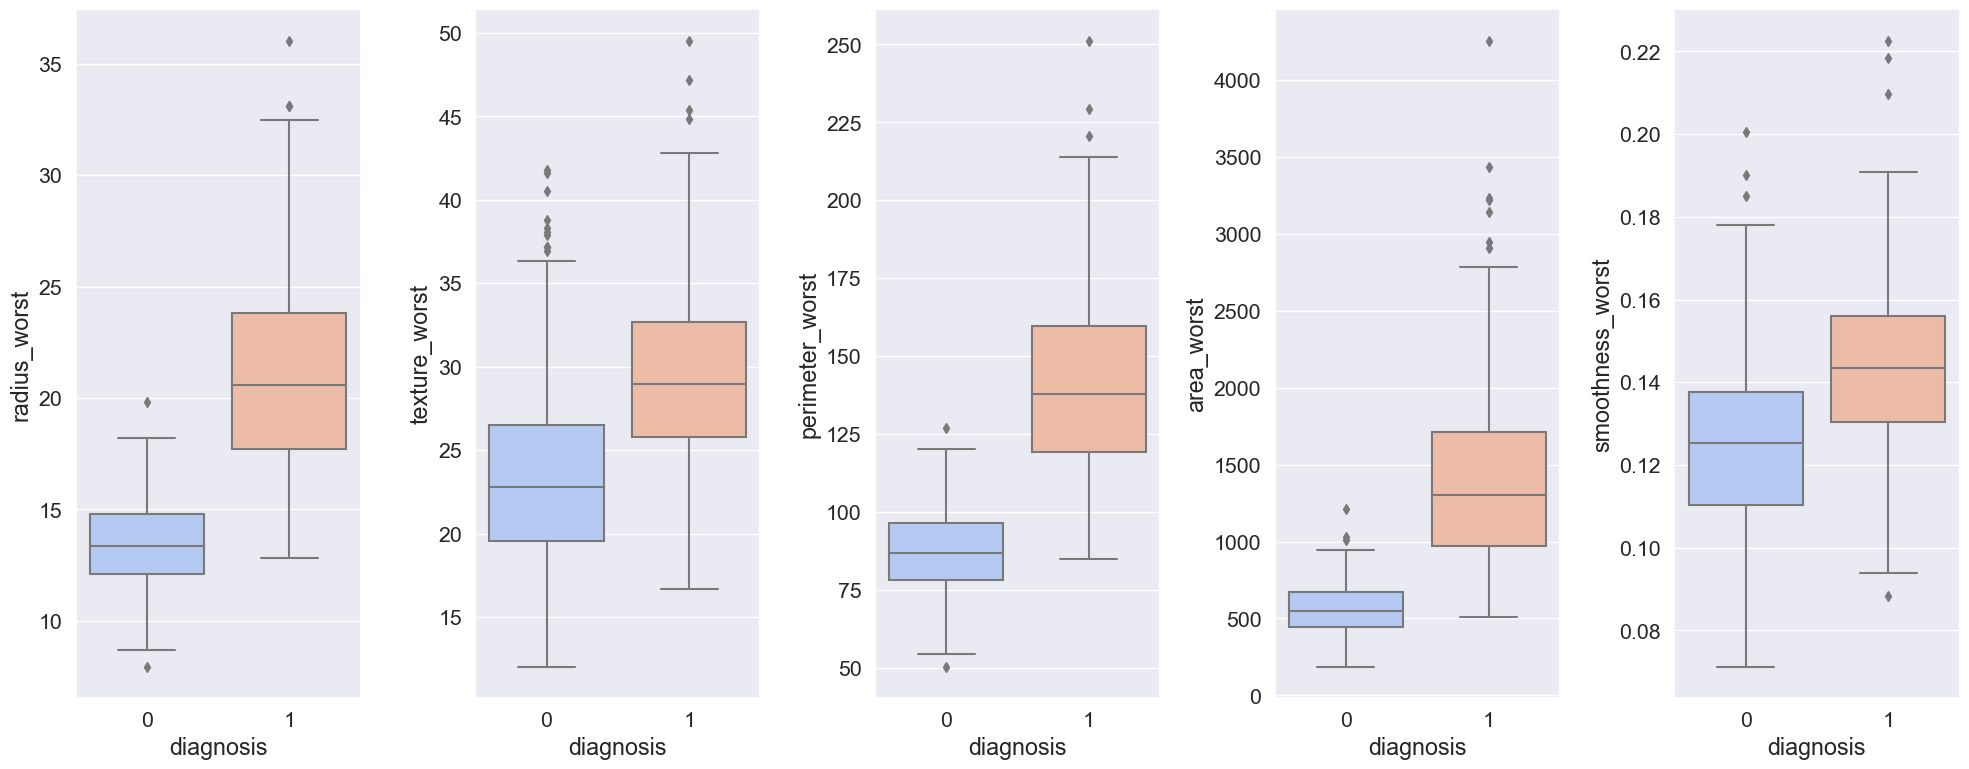

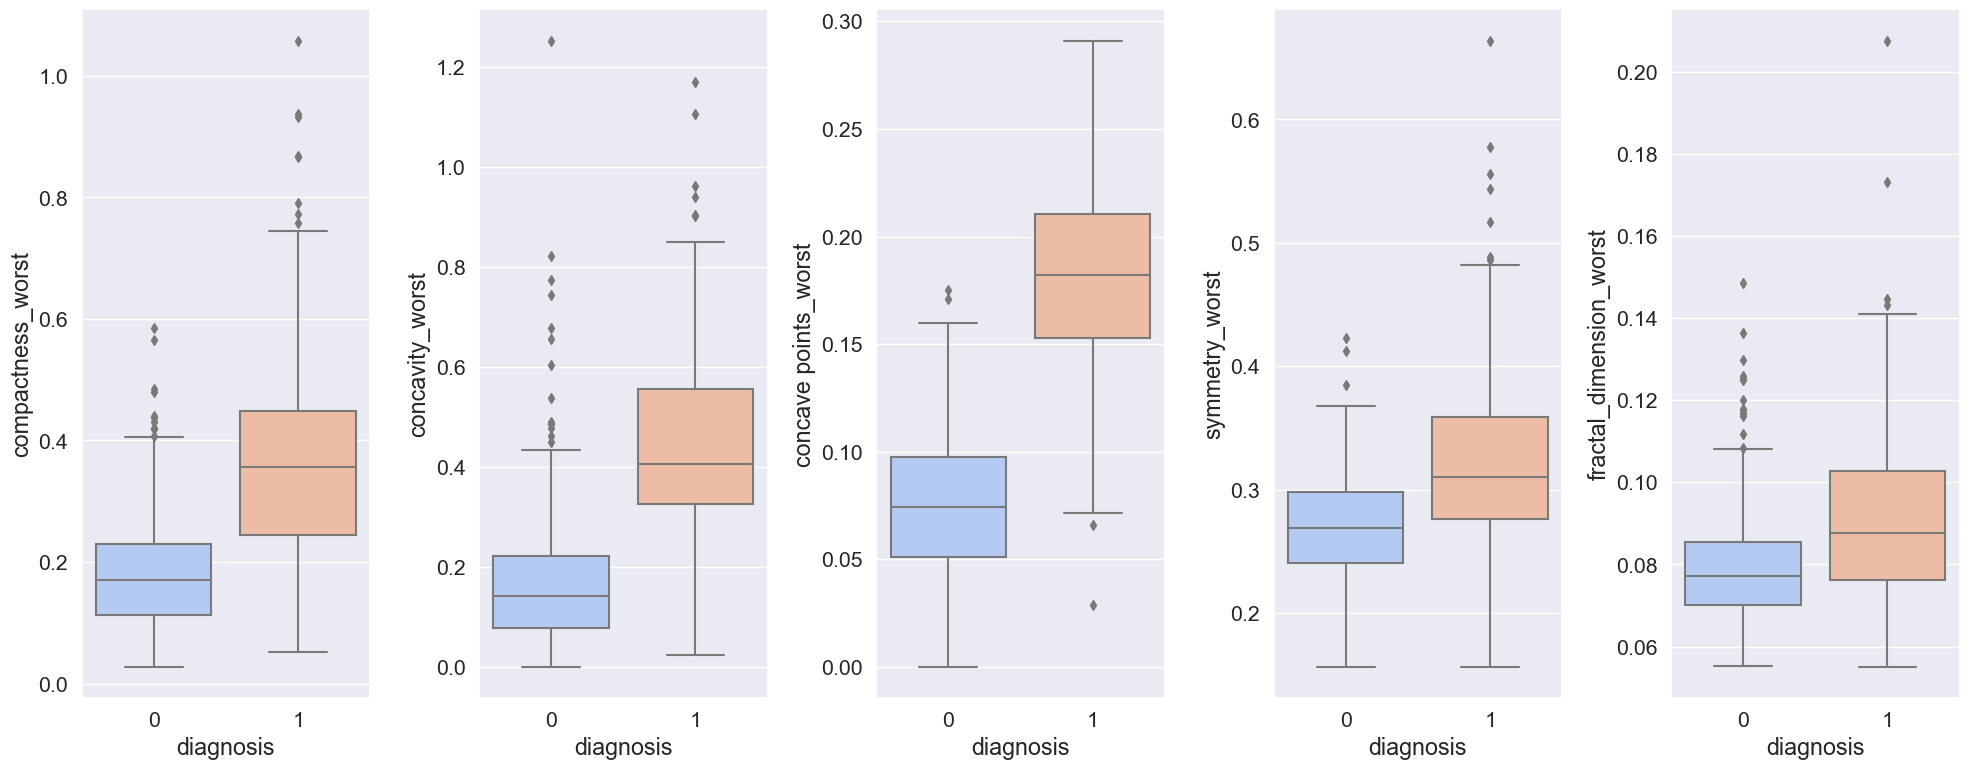

In [24]:
plt.rcParams['figure.figsize']=(20,8)
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
s.boxplot ('diagnosis', y = 'radius_worst',data = df , ax = ax1,palette = 'coolwarm')
s.boxplot ('diagnosis', y = 'texture_worst',data = df , ax = ax2,palette = 'coolwarm')
s.boxplot ('diagnosis', y = 'perimeter_worst',data = df , ax = ax3,palette = 'coolwarm')
s.boxplot ('diagnosis', y = 'area_worst',data = df , ax = ax4,palette = 'coolwarm')
s.boxplot ('diagnosis', y = 'smoothness_worst',data = df , ax = ax5,palette = 'coolwarm')
f .tight_layout()

f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
s.boxplot ('diagnosis', y = 'compactness_worst',data = df , ax = ax1,palette = 'coolwarm')
s.boxplot ('diagnosis', y = 'concavity_worst',data = df , ax = ax2,palette = 'coolwarm')
s.boxplot ('diagnosis', y = 'concave points_worst',data = df , ax = ax3,palette = 'coolwarm')
s.boxplot ('diagnosis', y = 'symmetry_worst',data = df , ax = ax4,palette = 'coolwarm')
s.boxplot ('diagnosis', y = 'fractal_dimension_worst',data = df , ax = ax5,palette = 'coolwarm')
f .tight_layout()



In [25]:

def FitModel (X,Y, algo_name , algorithm, gridSearchParams, cv):
    np.random.seed(10)
    x_train, x_test, y_train, y_test = train_test_split (X,Y,test_size = 0.2)
    
    # Find the Parameters , then choose best parameters 

    grid = GridSearchCV(estimator = algorithm, param_grid = gridSearchParams,
                        cv = cv, scoring = 'accuracy', verbose = 1 , n_jobs = -1 )
    
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict (x_test)
    cm = confusion_matrix (y_test,pred)
    
    print (pred)
    pickle.dump(grid_result,open(algo_name,'wb'))
    
    print ('Best Params :', best_params)
    print ('Classification Report:',classification_report(y_test,pred))
    print ('Accuracy Score', (accuracy_score(y_test,pred)))
    print ('Confusion Matrix :\n',cm)


In [26]:
#cv = cross validation 
param = {
            'C': [0.1,1,100,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }

FitModel (x_norm,y,'SVC',SVC(), param, cv =10)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params : {'C': 0.1, 'gamma': 0.1}
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        39

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

Accuracy Score 1.0
Confusion Matrix :
 [[75  0]
 [ 0 39]]


In [27]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (x_norm,y,'Random Forest',RandomForestClassifier(), param, cv =10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params : {'n_estimators': 1000}
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Accuracy Score 0.9912280701754386
Confusion Matrix :
 [[74  1]
 [ 0 39]]


In [28]:
np.random.seed(10)
x_train,x_test, y_train,y_test = train_test_split (x_norm,y,test_size = 0.2)
forest = RandomForestClassifier (n_estimators = 500)
fit = forest.fit (x_train, y_train)
accuracy = fit.score(x_test,y_test)
predict = fit.predict(x_test)
cmatrix = confusion_matrix (y_test, predict)
print ('Classification Report:',classification_report(y_test,predict))
print ('Accuracy Score', (accuracy_score(y_test,predict)))
print ('Accuracy of Random Forest ', (accuracy))
print ('Confusion Matrix :\n',cmatrix)



Classification Report:               precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Accuracy Score 0.9912280701754386
Accuracy of Random Forest  0.9912280701754386
Confusion Matrix :
 [[74  1]
 [ 0 39]]


In [29]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (x_norm,y,'XGBoost', XGBClassifier(),param, cv = 10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[20:39:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params : {'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        39

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00     

In [30]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
sm = SMOTE(random_state =42)
X_res, Y_res = sm.fit_resample (x_norm, y)



In [33]:
display (Y_res.value_counts())

1    357
0    357
Name: diagnosis, dtype: int64

In [34]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (X_res, Y_res ,'Random Forest',RandomForestClassifier(), param, cv =10)



Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params : {'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        75

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143

Accuracy Score 1.0
Confusion Matrix :
 [[68  0]
 [ 0 75]]


In [35]:

param = {
            'C': [0.1,1,100,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }
FitModel (X_res, Y_res,'SVC',SVC(), param, cv =10)




Fitting 10 folds for each of 36 candidates, totalling 360 fits
[1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params : {'C': 0.1, 'gamma': 0.1}
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        75

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143

Accuracy Score 1.0
Confusion Matrix :
 [[68  0]
 [ 0 75]]


In [36]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (X_res, Y_res,'XGBoost', XGBClassifier(),param, cv = 10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[20:45:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params : {'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        75

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00 

In [37]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
print ("Feature Ranking:")
for f in range (x_norm.shape[1]):
    print ("Feature %s (%f)"  %(list (x_norm)[f],importances[indices[f]]))


Feature Ranking:
Feature radius_mean (0.275118)
Feature texture_mean (0.108618)
Feature perimeter_mean (0.096804)
Feature area_mean (0.095658)
Feature smoothness_mean (0.090771)
Feature compactness_mean (0.056902)
Feature concavity_mean (0.037418)
Feature concave points_mean (0.035903)
Feature symmetry_mean (0.034731)
Feature fractal_dimension_mean (0.028305)
Feature radius_se (0.026730)
Feature texture_se (0.026666)
Feature perimeter_se (0.010250)
Feature area_se (0.009334)
Feature smoothness_se (0.009206)
Feature compactness_se (0.008240)
Feature concavity_se (0.007708)
Feature concave points_se (0.006809)
Feature symmetry_se (0.005010)
Feature fractal_dimension_se (0.004329)
Feature radius_worst (0.003400)
Feature texture_worst (0.003005)
Feature perimeter_worst (0.002733)
Feature area_worst (0.002533)
Feature smoothness_worst (0.002305)
Feature compactness_worst (0.002170)
Feature concavity_worst (0.002132)
Feature concave points_worst (0.002115)
Feature symmetry_worst (0.001889)
F

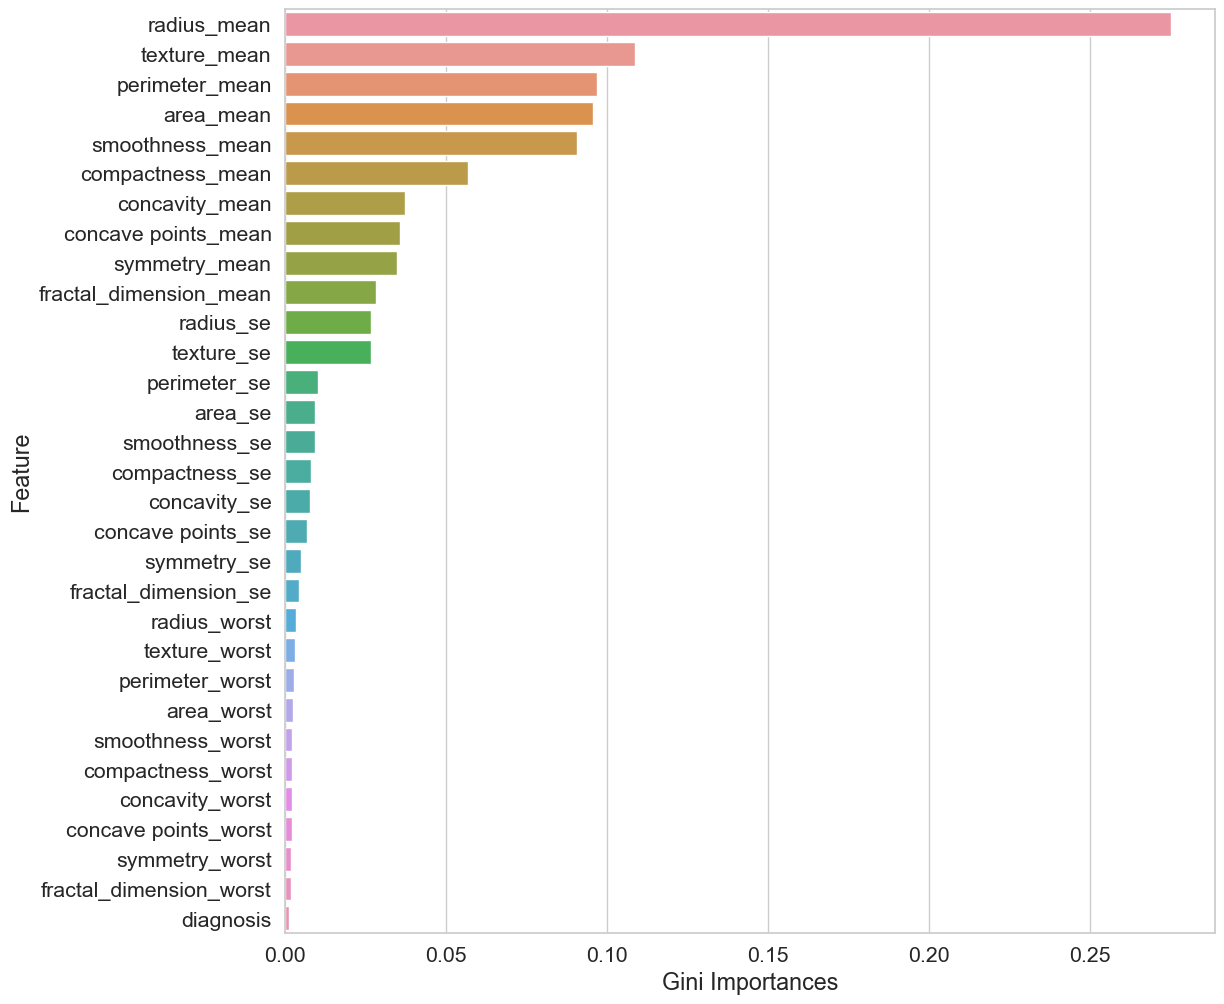

In [38]:
feat_imp = pd.DataFrame({'Feature': list(x_norm), 'Gini importance': importances[indices]})
plt.rcParams['figure.figsize']= (12,12)
s.set_style ('whitegrid')
ax= s.barplot(x ='Gini importance', y = 'Feature', data = feat_imp  )
ax.set (xlabel = 'Gini Importances')
plt.show()

feat_imp.index = feat_imp.Feature


In [39]:
feat_to_keep = feat_imp.iloc[:15].index
type(feat_to_keep),feat_to_keep



(pandas.core.indexes.base.Index,
 Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
        'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se'],
       dtype='object', name='Feature'))

In [40]:
X_res = pd.DataFrame(X_res)
Y_res = pd.DataFrame(Y_res)
X_res.columns = x_norm.columns
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (X_res [feat_to_keep], Y_res ,'Random Forest',RandomForestClassifier(), param, cv =10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params : {'n_estimators': 1000}
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.96      0.97        68
           1       0.96      0.99      0.97        75

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Accuracy Score 0.972027972027972
Confusion Matrix :
 [[65  3]
 [ 1 74]]


In [41]:

param = {
            'C': [0.1,1,100,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }
FitModel (X_res [feat_to_keep], Y_res,'SVC',SVC(), param, cv =5)



Fitting 5 folds for each of 36 candidates, totalling 180 fits
[1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0]
Best Params : {'C': 100, 'gamma': 10}
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.93      0.96        68
           1       0.94      1.00      0.97        75

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

Accuracy Score 0.965034965034965
Confusion Matrix :
 [[63  5]
 [ 0 75]]


In [42]:

param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (X_res [feat_to_keep], Y_res,'XGBoost', XGBClassifier(),param, cv = 5)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[20:49:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params : {'n_estimators': 500}
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.97      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99  

In [43]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (X_res, Y_res ,'Random Forest',RandomForestClassifier(), param, cv =10) 


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params : {'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        75

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143

Accuracy Score 1.0
Confusion Matrix :
 [[68  0]
 [ 0 75]]


In [44]:
  param = {
            'C': [0.1,1,100,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }
FitModel (X_res, Y_res,'SVC',SVC(), param, cv =10)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params : {'C': 0.1, 'gamma': 0.1}
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        75

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143

Accuracy Score 1.0
Confusion Matrix :
 [[68  0]
 [ 0 75]]


In [45]:

param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (X_res, Y_res,'XGBoost', XGBClassifier(),param, cv = 10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[20:51:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params : {'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        75

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00 

In [46]:

load_model =pickle.load(open("XGBoost","rb"))


In [47]:
pred1 = load_model.predict (x_test)
pred1


array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1])

In [48]:
load_model.best_params_

{'n_estimators': 100}

In [49]:
print (accuracy_score (pred1,y_test))

1.0


In [50]:
load_model =pickle.load(open("SVC","rb"))
pred1 = load_model.predict (x_test)
print (load_model.best_params_)
print (accuracy_score (pred1,y_test))
display (pred1)


{'C': 0.1, 'gamma': 0.1}
1.0


array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1])

In [51]:
load_model =pickle.load(open("Random Forest","rb"))
pred1 = load_model.predict (x_test)
print (load_model.best_params_)
print (accuracy_score (pred1,y_test))
display (pred1)



{'n_estimators': 100}
1.0


array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1])